# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [585]:
df = pd.read_csv("data/titanic.csv")

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [586]:
train = df.sample(frac=0.7)
test  = df.loc[df.index.difference(train.index)]
len(train), len(test)

(624, 267)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [587]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

train, train_Y = get_features_and_target(train)
test, test_Y = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Полезно сначала посмотреть на то, какие признаки у нас имеются:

In [588]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 65 to 40
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  624 non-null    int64  
 1   Sex     624 non-null    object 
 2   Age     495 non-null    float64
 3   SibSp   624 non-null    int64  
 4   Parch   624 non-null    int64  
 5   Fare    624 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 34.1+ KB


In [575]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
296,3,male,23.50,0,0,7.2292
831,2,male,0.83,1,1,18.7500
754,2,female,48.00,1,2,65.0000
301,3,male,NaN,2,0,23.2500
668,3,male,43.00,0,0,8.0500


In [589]:
train.Pclass.unique(), train.Sex.unique(), train.SibSp.unique(), train.Parch.unique()

(array([3, 2, 1]),
 array(['male', 'female'], dtype=object),
 array([1, 0, 2, 8, 4, 3, 5]),
 array([1, 0, 2, 3, 4, 5]))

Как видно выше, *Pclass*, *SibSp*, *Parch* - категориальные, *Sex* - бинарный, *Fare*, *Age* - вещественные.

Мне неудобно работать с train и train_Y по отдельности, поэтому я объединю их в один фрейм:

In [854]:
df = train.copy()
df['Survived'] = train_Y

Посмотрим на missing values:

In [855]:
df.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Survived    False
dtype: bool

In [856]:
df['Age'].isna().sum()

129

121 из 600+. Просто удалить вхождения с NaN нельзя, выборка ощутимо уменьшится. Предлагаю пока ничего с этим не делать (можно было бы попробовать конечно заполнить медианным возрастом или посмотреть на результаты KNN по другим фичам, но это долго и в EDA никак не поможет)

Text(0, 0.5, 'Количество')

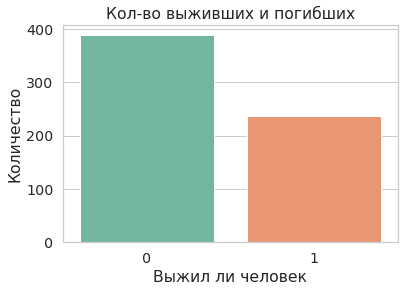

In [857]:
ax = sns.countplot(x="Survived", data=df)
ax.set_title("Кол-во выживших и погибших")
ax.set_xlabel("Выжил ли человек");
ax.set_ylabel("Количество")

К сожалению, погибших почти в два раза больше, чем выживших.

Интересно проверить, правда ли, что выживаемость женщин в целом выше выживаемости мужчин на борту. Посмотрим на barplot по этому признаку:

Text(0, 0.5, 'Доля выживших')

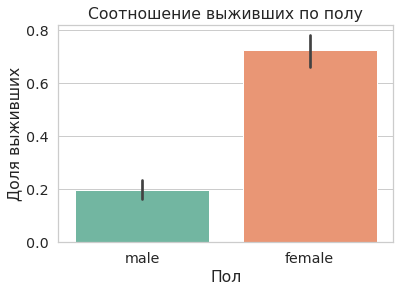

In [858]:
ax = sns.barplot(x=df['Sex'], y=df['Survived'])
ax.set_title("Соотношение выживших по полу")
ax.set_xlabel("Пол");
ax.set_ylabel("Доля выживших")

Все верно, теперь проверим шансы на выживаемость обоих полов:

Выжило 19.76% мужчин из всех мужчин
Выжило 72.43% женщин из всех женщин


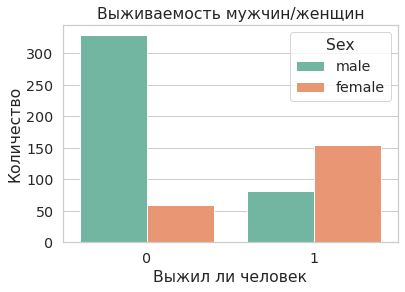

In [859]:
ax = sns.countplot(x='Survived', hue='Sex', data=df)
ax.set_title("Выживаемость мужчин/женщин")
ax.set_xlabel("Выжил ли человек");
ax.set_ylabel("Количество")

def count_percentage(sex, dataframe=df):
    mapp = {"male" : "мужчин", "female" : "женщин"}
    pc = (dataframe[dataframe['Sex'] == sex]['Survived'].sum() / len(dataframe[dataframe['Sex'] == sex]) * 100).round(2)
    print(f"Выжило {pc}% {mapp[sex]} из всех {mapp[sex]}")

count_percentage('male')
count_percentage('female')

Выводы? Как видим, если вы - мужчина и вы плывете на титанике, то почти наверняка вы умрете. А еще можно понять, что пол - важный признак для будущего decision tree.

Теперь проверим еще одну очевидную гипотезу - выживаемость детей была выше выживаемости взрослых. Предположим, что ребенок - это человек от 0 до 16 лет.

In [860]:
df['IsChild'] = df['Age'] < 16

print(f"Count of children: {(df['Age'] < 16).sum()}/{len(df)}")

def count_percentage(param, category):
    pc = (df[df[param] == category]['Survived'].sum() / len(df[df[param] == category]) * 100).round(2)
    print(f"Survived {pc}% from all from category")
    
count_percentage('IsChild', True)
count_percentage('IsChild', False)

Count of children: 62/624
Survived 59.68% from all from category
Survived 35.41% from all from category


Вторая строчка - процент выживших среди всех детей-пассажиров, третья - процент выживших среди всех пассажиров, которые не являются детьми. Не такой чудовищный разброс, как в предыдущем случае, но, возможно, тоже может пригодиться. Возможно, выживаемость в этой категории не так сильно зависит от пола?:

Text(0, 0.5, 'Доля')

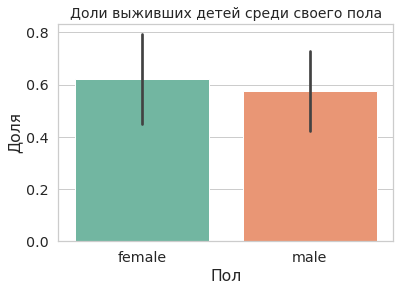

In [870]:
chdf = df[df['IsChild'] == True]
ax = sns.barplot(x=chdf['Sex'], y=chdf['Survived'])
ax.set_title("Доли выживших детей среди своего пола", fontsize=14)
ax.set_xlabel("Пол");
ax.set_ylabel("Доля")

Верно! Теперь в decision tree можно отдельно обрабатывать случай, когда пассажир - ребенок.

In [597]:
df = df.drop(df[df['IsChild'] == True].index)

 Получше посмотрим на признак возраста.

In [598]:
df['Age'].describe()

count    433.000000
mean      32.722864
std       12.100777
min       16.000000
25%       24.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Распределение возраста людей')

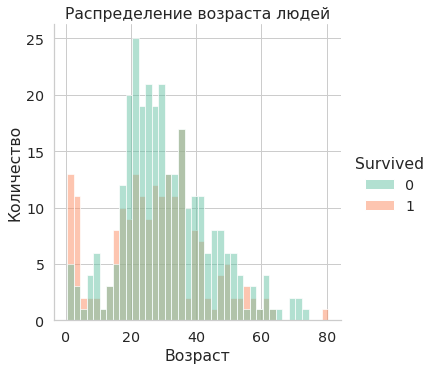

In [881]:
ax = sns.displot(x="Age", hue="Survived", data=df, binwidth=2)
ax.set(xlabel='Возраст', ylabel='Количество')
plt.title("Распределение возраста людей")

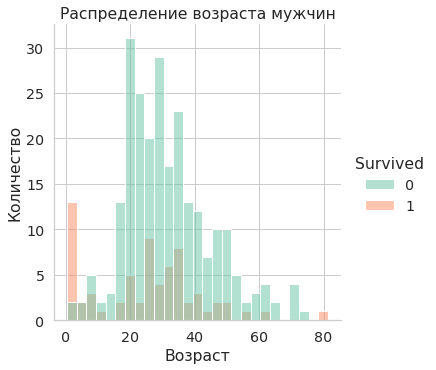

In [883]:
ax = sns.displot(x="Age", hue="Survived", data=df[df['Sex'] == 'male'], binwidth=3)
plt.title("Распределение возраста мужчин")
ax.set(xlabel='Возраст', ylabel='Количество')

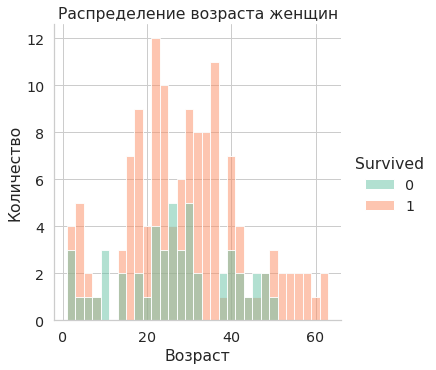

In [884]:
ax = sns.displot(x="Age", hue="Survived", data=df[df['Sex'] == 'female'], binwidth=2)
plt.title("Распределение возраста женщин")
ax.set(xlabel='Возраст', ylabel='Количество')

Можем сделать несколько выводов:
- больше всего умерло людей в возрасте от 20 до ~45
- чем старше человек, тем выше вероятность того, что он погибнет
- больше всего выжило женщин в возрастной категории 20-45 лет
- больше всего погибло мужчин в возрастной категории 20-45 лет

Можно сделать неправильный вывод о том, что если человеку от 60 до 80 лет, то он точно умрет. Скорее всего, наша выборка нерезепрентативна - среди людей такого возраста есть только те, которые не выжили.

In [605]:
df[df['Age'] > 65]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,IsChild
96,1,male,71.0,0,0,34.6542,0,False
745,1,male,70.0,1,1,71.0000,0,False
672,2,male,70.0,0,0,10.5000,0,False
851,3,male,74.0,0,0,7.7750,0,False
493,1,male,71.0,0,0,49.5042,0,False
630,1,male,80.0,0,0,30.0000,1,False


Посмотрим на корелляцию других признаков друг с другом и с target:

Text(0.5, 1.0, 'Корелляция признаков')

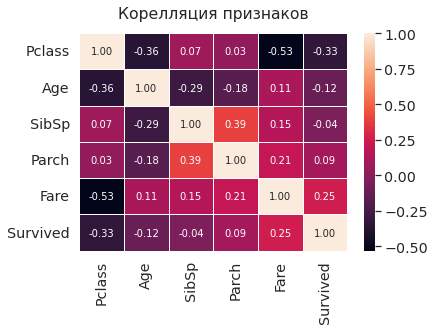

In [891]:
sns.heatmap(df.drop(columns=['IsChild']).corr(), annot=True, linewidths=0.5, fmt='.2f')
plt.title("Корелляция признаков", pad=15)

Если верить таблице, выживаемость зависит от стоимости билета.

In [607]:
df['Fare'].describe()

count    562.000000
mean      33.022619
std       55.171963
min        0.000000
25%        7.895800
50%       13.000000
75%       30.000000
max      512.329200
Name: Fare, dtype: float64

[Text(0.5, 0, 'Стоимость'), Text(0, 0.5, 'Плотность')]

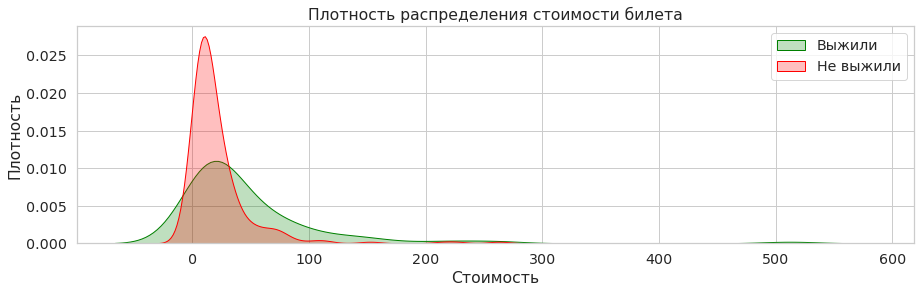

In [903]:
fig, ax = plt.subplots(figsize=(15, 4))
plot = sns.kdeplot(data=df[df['Survived'] == True]['Fare'], color="Green", shade=True, legend=True)
plot = sns.kdeplot(data=df[df['Survived'] == False]['Fare'], color="Red", shade=True, legend=True, ax=ax)
plt.title("Плотность распределения стоимости билета")
plot.legend(["Выжили", "Не выжили"], loc='upper right')
ax.set(xlabel='Стоимость', ylabel='Плотность')

У пассажиров с дорогим (>45 у.е.) билетом было больше шансов выжить. Посмотрим на мужчин с такими билетами.

In [609]:
males = df[df['Sex'] == 'male']
hdf = males[males['Fare'] >= 45]
div = males.loc[males.index.difference(hdf.index)]

Выжило 29.63% из всех мужчин с билетмаи >= 45 у.е.
Выжило 14.24% из всех мужчин с билетмаи < 45 у.е.


[Text(0.5, 0, 'Выжил ли мужчина'), Text(0, 0.5, 'Количество')]

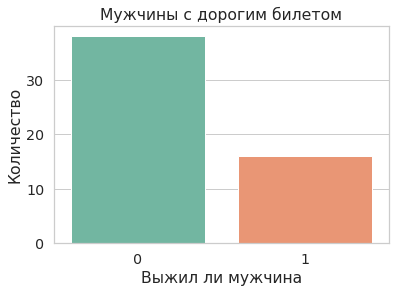

In [908]:
print(f"Выжило { ( hdf['Survived'].sum() / len(hdf) * 100 ).round(2) }% из всех мужчин с билетмаи >= 45 у.е.")
print(f"Выжило {(div['Survived'].sum() / len(div) * 100).round(2)}% из всех мужчин с билетмаи < 45 у.е.")
ax = sns.countplot(x="Survived", data=hdf)
ax.set_title("Мужчины с дорогим билетом")
ax.set(xlabel='Выжил ли мужчина', ylabel='Количество')

Я продолжаю пытаться понять, какие мужчины выживут с вероятностью хотя бы 45-50%, поэтому вынесем признак стоимости билета в отдельную фичу для дальнейшего исследования корелляций с другими.

In [611]:
df['IsMaleHighFare'] = (df['Fare'] >= 45) & (df['Sex'] == 'male')

От класса пассажира также зависит выживаемость - у пассажиров в 3м классе были очень небольшие шансы выжить:

In [613]:
pclass = df.groupby("Pclass").sum()['Survived'] / df.groupby("Pclass").count()['Survived']
pclass

Pclass
1    0.598592
2    0.408333
3    0.216667
Name: Survived, dtype: float64

Теперь займемся анализом зависимостей между признаками, например, между полом и Pclass. Это будет полезно для построения нижних уровней дерева.

In [909]:
ctab = pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True)
ctab.style.background_gradient(cmap='magma')

In [910]:
pclass_surv_rate = []
for i in range(1, 4):
    pclass_surv_rate.append(ctab.loc[('male',  1)][i] / (ctab.loc[('male',  1)][i] + ctab.loc[('male',  0)][i]) * 100)

print(f'Выживаемость мужчин в 1 классе: {pclass_surv_rate[0]}%, в 2 классе: {pclass_surv_rate[1]}%, в 3 классе: {pclass_surv_rate[2]}%')

Выживаемость мужчин в 1 классе: 34.523809523809526%, в 2 классе: 19.51219512195122%, в 3 классе: 14.754098360655737%


Видно, что 41/48 ~= 85% погибших женщин путешествовали классом Pclass=3, 194/315 ~= 61% погибших мужчин путешествовали тем же классом. Также можно понять, что чаще всего мужчины выживали в 1 классе, чаще всего умирали - во втором.

Объединим Parch и SibSp в один признак RelCnt исходя из банального предположения о том, что родственники (неважно, какого типа) помогают друг другу (банально, потому что в жизни так бывает не всегда).

In [617]:
df['RelCnt'] = df['Parch'] + df['SibSp']

Проанализируем полученный признак.

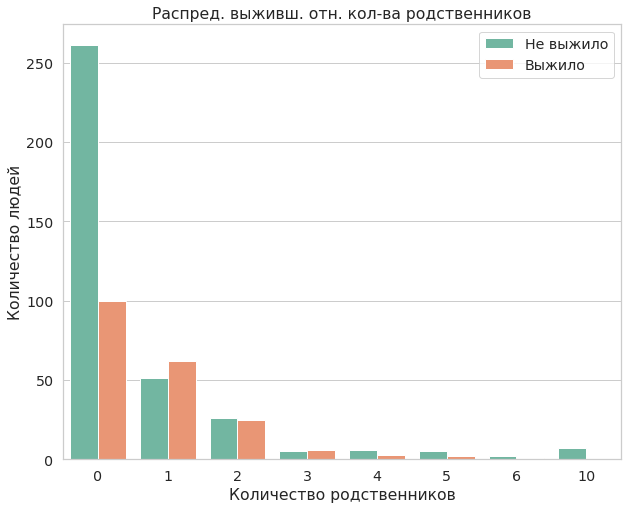

In [618]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x = "RelCnt", hue="Survived", data = df, ax = ax)
ax.set_title("Распред. выживш. отн. кол-ва родственников")
ax.set_xlabel("Количество родственников");
ax.set_ylabel("Количество людей")
ax.legend(["Не выжило", "Выжило"], loc = 'upper right')

То же самое, но в процентах:

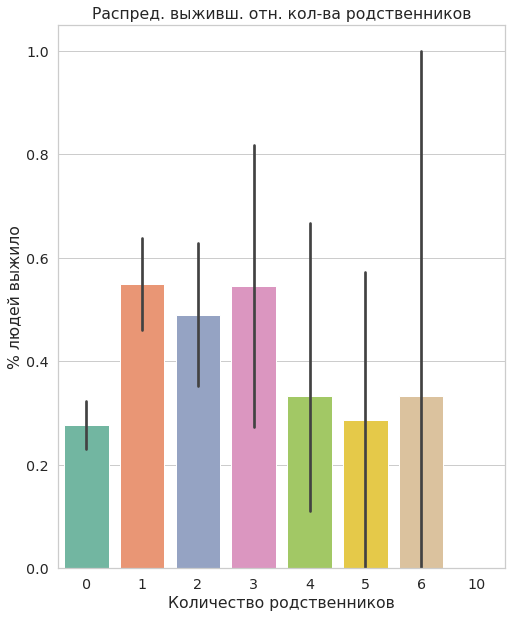

In [619]:
fig, ax = plt.subplots(figsize = (8,10))
sns.barplot(x = "RelCnt", y = "Survived", data=df, ax = ax)
ax.set_title("Распред. выживш. отн. кол-ва родственников")
ax.set_xlabel("Количество родственников");
ax.set_ylabel("% людей выжило");

Получается интересная закономерность, одинокие люди почти гарантированно умирают, больше везет людям с 1,2,3 родственниками. Людям с >3 родственниками, как и одиноким, не везет.

In [620]:
df = df.drop(columns=['SibSp', 'Parch'])

[Text(0.5, 0, 'Класс'), Text(0, 0.5, 'Стоимость')]

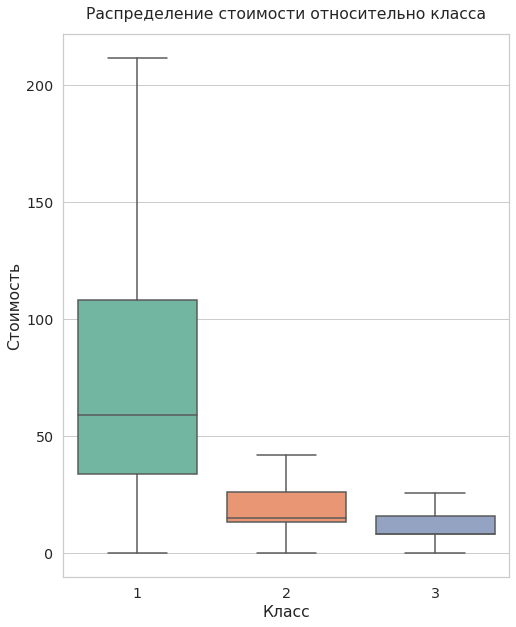

In [914]:
fig, ax = plt.subplots(figsize = (8,10))
sns.boxplot(x="Pclass", y="Fare", data=df, showfliers=False, ax=ax)
ax.set_title("Распределение стоимости относительно класса", pad=15)
ax.set(xlabel='Класс', ylabel='Стоимость')

Первый класс - самый дорогой.

[Text(0.5, 0, 'Класс'), Text(0, 0.5, 'Возраст')]

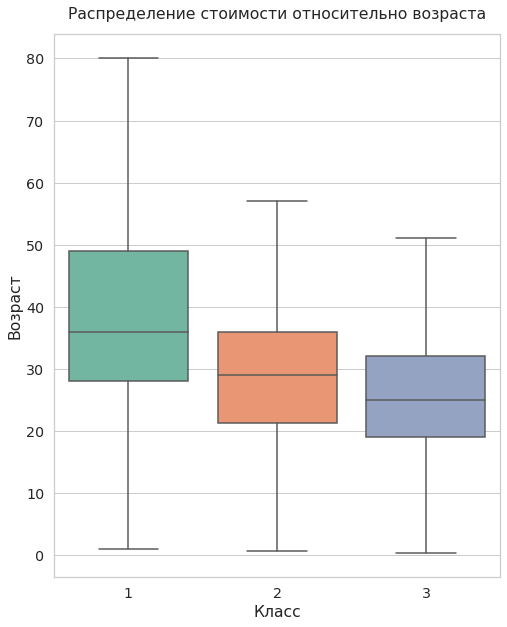

In [916]:
fig, ax = plt.subplots(figsize = (8,10))
sns.boxplot(x="Pclass", y="Age", data=df, showfliers=False, ax=ax)
ax.set_title("Распределение стоимости относительно возраста", pad=15)
ax.set(xlabel='Класс', ylabel='Возраст')

**Итого**

- выживаемость очень сильно зависит от пола (72% выживших Ж среди Ж против 20% выживших М среди М) 
- на пассажиров, которые не достигли 16-летнего возраста, вышесказанное влияет не сильно, поэтому выделяем их в отдельную категорию. 58% представителей этой категории выжили.
- больше всего выжило (умерло) женщин (мужчин) в возрастной категории 20-40 лет
- у пассажиров с дорогим (>45 у.е.) билетом было больше шансов выжить
- всего лишь 21% среди людей, путешествующих классом Pclass=3, выжили
- 85% погибших женщин путешествовали классом Pclass=3, 61% погибших мужчин путешествовали тем же классом.
- ~30% одиноких людей выжило, примерно столько же с 4 родственниками, чуть больше - с 5 и 6.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**


Люди, путешествующие классом 3, с высокой долей вероятности погибнут - это подтверждается статистикой по смертности женщин и мужчин в этом классе (более того, почти все погибшие женщины, путешествовали 3 классом). Далее, как выяснилось, пол очень важен - женщины выживают практически всегда, чего не скажешь о мужчинах, поэтому скажем, что если женщина не из 3 класса, то она выживает. Делать какие-либо предсказания по поводу мужчин сложно, но есть несколько факторов. Во-первых, мужчины из 1 класса выживают чаще мужчин из остальных. Во-вторых, предлагаю воспользоваться общей закономерностью относительно количества родственников - выше шансы выжить у тех, у кого их от 1 до 3.

In [763]:
def tree1(row: pd.core.series.Series) -> bool:
    if (row['Pclass'] == 3):
        return False
    if (row['Sex'] == 'male'):
        if (1 <= row['RelCnt'] <= 3):
            if (row['Pclass'] == 1):
                return True
            else:
                return False
        else:
            return False
    elif (row['Sex'] == 'female'):
        return True

**Дерево 2:**

Пользуемся тем, что процент выживаемости детей - 58%. Таже, люди с дешевым билетом чаще всего умирают, еще количество родственников влияет на выживаемость. Среди мужчин, стоимость билетов которых >=45, смертность все равно высокая, как было показано ранее.

In [819]:
def tree2(row: pd.core.series.Series) -> bool:
    if (row['IsChild']):
        # naive and kind model - children are always alive
        return True
    if (row['Fare'] < 45):
        if (row['RelCnt'] in (2,3)):
            return True
        return False
    else:
        if (row['Sex'] == 'male'):
            return False
        return True

In [821]:
def tree(features, tree_predictor):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    features['IsChild'] = features['Age'] < 16
    features['RelCnt'] = features['Parch'] + features['SibSp']
    return features.apply(tree_predictor, axis=1)

**Эксперимент**

In [917]:
def radical_tree(row: pd.core.series.Series) -> bool:
    return (row['Sex'] == 'female')

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**
Доля верных предсказаний, умноженная на 100

Реализуйте данный критерий по шаблону

In [822]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    return (target == predicted).sum() / len(target) * 100

Посчитайте качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [823]:
test_, test_y = test.copy(), test_Y.copy()
criteria(test_y, tree(test_, tree1))

79.02621722846442

In [820]:
criteria(test_y, tree(test_, tree2))

68.53932584269663

In [918]:
criteria(test_y, tree(test_, radical_tree))

81.27340823970037

#### 5. Выводы

Анализ показал, что, как мы и предполагали, выживаемость на Титанике очень сильно зависила от пола человека и его возраста - у женщин и детей было преимущество, такое правило соответствует этическим стандартам и нормам морали. Зависимость от пола так сильна, что наивная модель, которая помечает всех женщин выжившими (что в действительности не всегда правда), на тестовых данных дает самую высокую точность. Из-за этого было чрезвычайно трудно найти какие-либо признаки выживаемости у мужчин, поэтому пришлось обходится общими эвристиками, такими как количество родственников, стоимость билета и т.п.


Также мы увидели явный перекос в смертности в сторону людей из класса 3. Мы выяснили, что люди старшего возраста более склонны к поездке в первом классе, а люди из первого класса чаще выживали (в большей степени речь идет о мужинах). Ну и подтвердилось очевидное соображение о том, что билеты первого класса в среднем дороже.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
...

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
...

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

In [ ]:
...

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
...

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
...

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

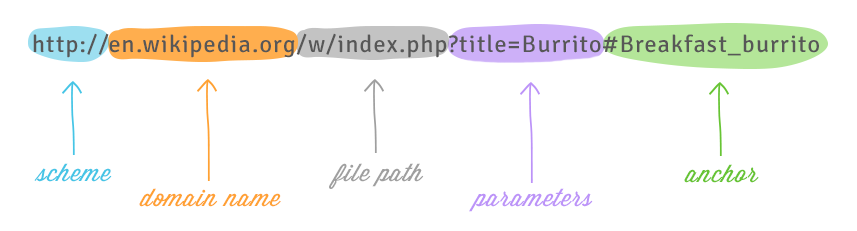

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму для времени скачивания страницы.

In [ ]:
...

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

In [ ]:
...

**Выводы:** <...>